# Exploración de datos de enfermedad cardiovascular

In [1]:
library(ggplot2)

In [2]:
# Cargamos los datos
data <- read.csv("../data/cardiovascular_disease.csv",
    colClasses = c("integer", "integer", "numeric", "factor", "integer", "numeric", "integer", "integer", "factor", "factor", "factor", "factor", "factor", "factor"),
    row.names=1)

In [28]:
# Dimensión de los datos
dim(data)

[1] 70000    13

In [29]:
# Algunos ejemplos
head(data)

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,18393,50.39178,2,168,62,110,80,1,1,0,0,1,0
1,20228,55.41918,1,156,85,140,90,3,1,0,0,1,1
2,18857,51.66301,1,165,64,130,70,3,1,0,0,0,1
3,17623,48.28219,2,169,82,150,100,1,1,0,0,1,1
4,17474,47.87397,1,156,56,100,60,1,1,0,0,0,0
8,21914,60.03836,1,151,67,120,80,2,2,0,0,0,0


In [30]:
# Más ejemplos
tail(data)

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
99992,21074,57.73699,1,165,80,150,80,1,1,0,0,1,1
99993,19240,52.71233,2,168,76,120,80,1,1,1,0,1,0
99995,22601,61.92055,1,158,126,140,90,2,2,0,0,1,1
99996,19066,52.23562,2,183,105,180,90,3,1,0,1,0,1
99998,22431,61.45479,1,163,72,135,80,1,2,0,0,0,1
99999,20540,56.27397,1,170,72,120,80,2,1,0,0,1,0


In [31]:
# Verificamos si tenemos algún dato faltante
any(is.na(data))

[1] FALSE

## Data preparation

### Description of attributes

id: id number

age_days: age in days

age_year: age in years

gender: gender (1 = women, 2 = men)

height: height in cm

weight: weight in kg

ap_hi: systolic blood pressure

ap_lo: diastolic blood pressure

cholesterol: cholesterol (1 = normal, 2 = above normal, 3 = well above normal)

gluc: glucose level (1 = normal, 2 = above normal, 3 = well above normal)

smoke: whether patient smokes or not (0 = no, 1 = yes)

alco: whether patient drinks alcohol or not (0 = no, 1 = yes)

active: binary feature (0 = passive life, 1 = active life)

cardio: Target variable, whether patient has cardiovascular disease or not (0 = no, 1 = yes)

Enlaces con información del dataset:
- https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
- https://github.com/caravanuden/cardio?tab=readme-ov-file

In [3]:
# Delete age_days due to redundancy with age_year
data <- data[-1]
head(data)

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,50.39178,2,168,62,110,80,1,1,0,0,1,0
1,55.41918,1,156,85,140,90,3,1,0,0,1,1
2,51.66301,1,165,64,130,70,3,1,0,0,0,1
3,48.28219,2,169,82,150,100,1,1,0,0,1,1
4,47.87397,1,156,56,100,60,1,1,0,0,0,0
8,60.03836,1,151,67,120,80,2,2,0,0,0,0


In [4]:
# Rename categorical attributes
levels(data$gender) <- c("Female", "Male")
levels(data$cholesterol) <- c("Normal", "Above-Normal", "Well-Above-Normal")
levels(data$gluc) <- c("Normal", "Above-Normal", "Well-Above-Normal")
levels(data$smoke) <- c("No", "Yes")
levels(data$alco) <- c("No", "Yes")
levels(data$active) <- c("No", "Yes")
levels(data$cardio) <- c("No", "Yes")
head(data)

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,50.39178,Male,168,62,110,80,Normal,Normal,No,No,Yes,No
1,55.41918,Female,156,85,140,90,Well-Above-Normal,Normal,No,No,Yes,Yes
2,51.66301,Female,165,64,130,70,Well-Above-Normal,Normal,No,No,No,Yes
3,48.28219,Male,169,82,150,100,Normal,Normal,No,No,Yes,Yes
4,47.87397,Female,156,56,100,60,Normal,Normal,No,No,No,No
8,60.03836,Female,151,67,120,80,Above-Normal,Above-Normal,No,No,No,No


## Data summary statistics

In [42]:
# Obtenemos estadísitcas de las variables 
summary(data)

    age_year        gender          height          weight      
 Min.   :29.58   Female:45530   Min.   : 55.0   Min.   : 10.00  
 1st Qu.:48.39   Male  :24470   1st Qu.:159.0   1st Qu.: 65.00  
 Median :53.98                  Median :165.0   Median : 72.00  
 Mean   :53.34                  Mean   :164.4   Mean   : 74.21  
 3rd Qu.:58.43                  3rd Qu.:170.0   3rd Qu.: 82.00  
 Max.   :64.97                  Max.   :250.0   Max.   :200.00  
     ap_hi             ap_lo                     cholesterol   
 Min.   : -150.0   Min.   :  -70.00   Normal           :52385  
 1st Qu.:  120.0   1st Qu.:   80.00   Above-Normal     : 9549  
 Median :  120.0   Median :   80.00   Well-Above-Normal: 8066  
 Mean   :  128.8   Mean   :   96.63                            
 3rd Qu.:  140.0   3rd Qu.:   90.00                            
 Max.   :16020.0   Max.   :11000.00                            
                gluc       smoke        alco       active      cardio     
 Normal           :594

In [45]:
# Observamos la desviación estandar
quantitative.rows <- c(1,3,4,5,6)
lapply(data[, quantitative.rows], sd)

$age_year
[1] 6.759594

$height
[1] 8.210126

$weight
[1] 14.39576

$ap_hi
[1] 154.0114

$ap_lo
[1] 188.4725

In [46]:
# Observamos si existe correlación entre las variables
cor(data[, quantitative.rows],method = "p")
cor(data[, quantitative.rows],method = "s")
# cor(data,method = "k")

,age_year,height,weight,ap_hi,ap_lo
age_year,1.00000000,-0.081515349,0.05368404,0.020764319,0.017647434
height,-0.08151535,1.000000000,0.29096783,0.005487764,0.006150467
weight,0.05368404,0.290967835,1.00000000,0.030702209,0.043709773
ap_hi,0.02076432,0.005487764,0.03070221,1.000000000,0.016085513
ap_lo,0.01764743,0.006150467,0.04370977,0.016085513,1.000000000


,age_year,height,weight,ap_hi,ap_lo
age_year,1.00000000,-0.08229226,0.06155894,0.21908653,0.15669953
height,-0.08229226,1.00000000,0.31356927,0.01938127,0.03053381
weight,0.06155894,0.31356927,1.00000000,0.27774886,0.25441979
ap_hi,0.21908653,0.01938127,0.27774886,1.00000000,0.73543611
ap_lo,0.15669953,0.03053381,0.25441979,0.73543611,1.00000000


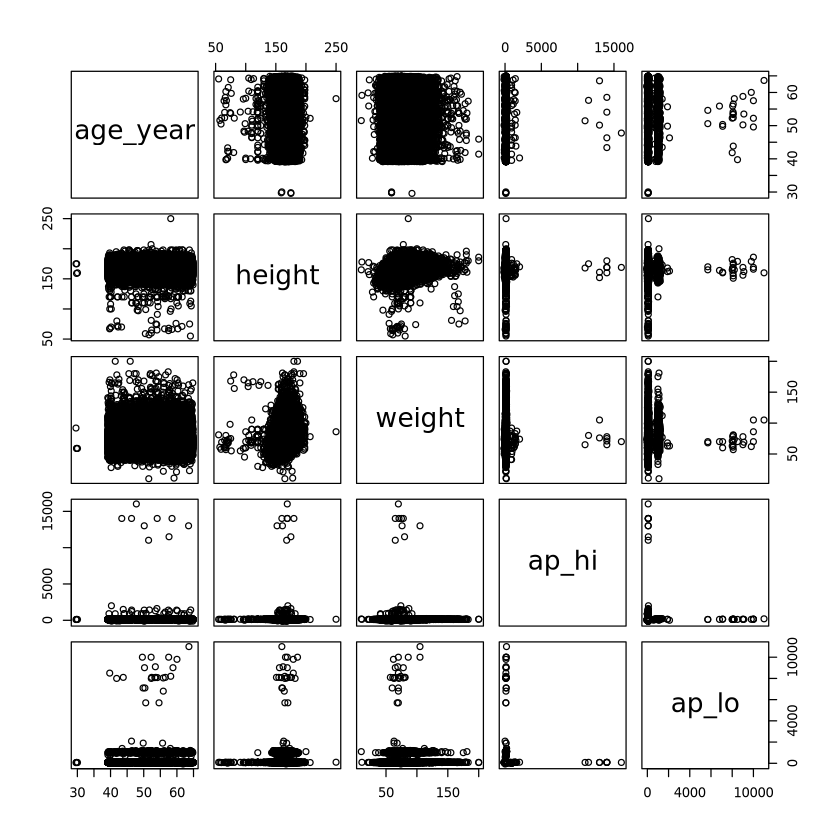

In [47]:
# Hacemos un meustreo para poder visualizar
par(bg="white")
pairs(data[,quantitative.rows])

## Data distribution differences across cardiovascular condition


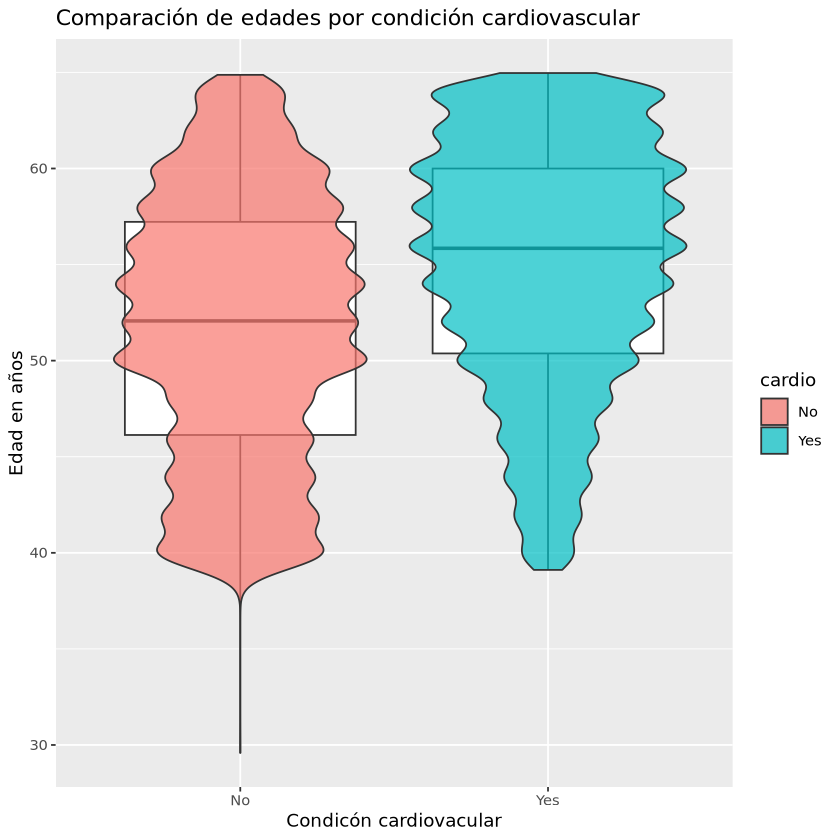

In [11]:
ggplot(data, aes(x=cardio, y=age_year, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.7, ) +
 labs(title = "Comparación de edades por condición cardiovascular", x = "Condicón cardiovacular", y="Edad en años") 

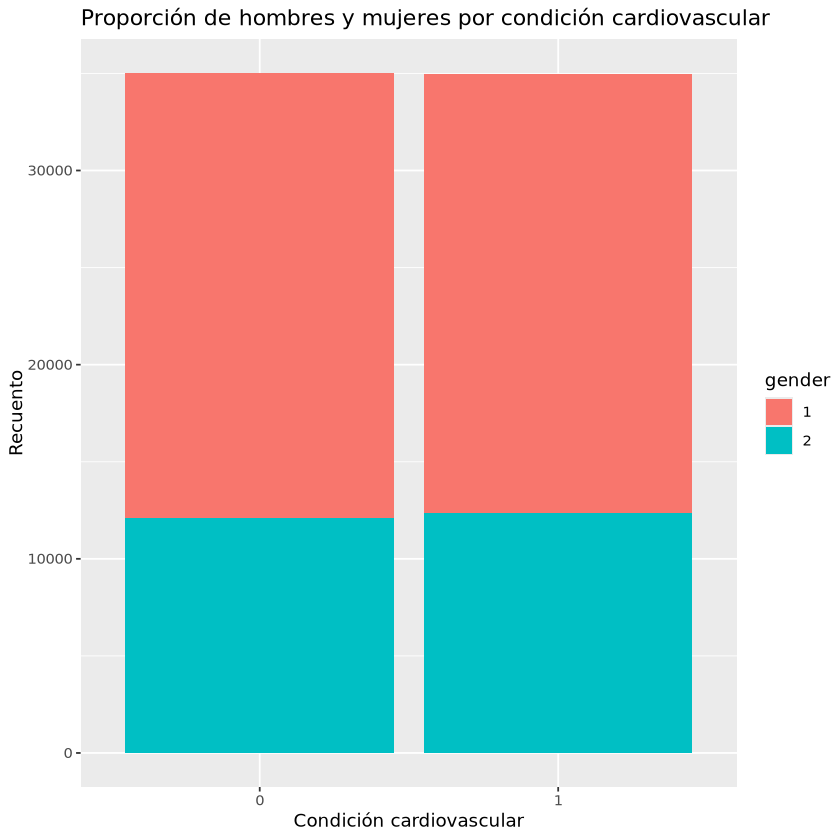

In [78]:
ggplot(data, aes(x=cardio, fill=gender)) +
 geom_bar() +
 labs(title = "Proporción de hombres y mujeres por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")

In [113]:
# Añadimos IMC para resumir la información del peso y la altura
data$IMC <- data$weight / ((data$height / 100)**2) 

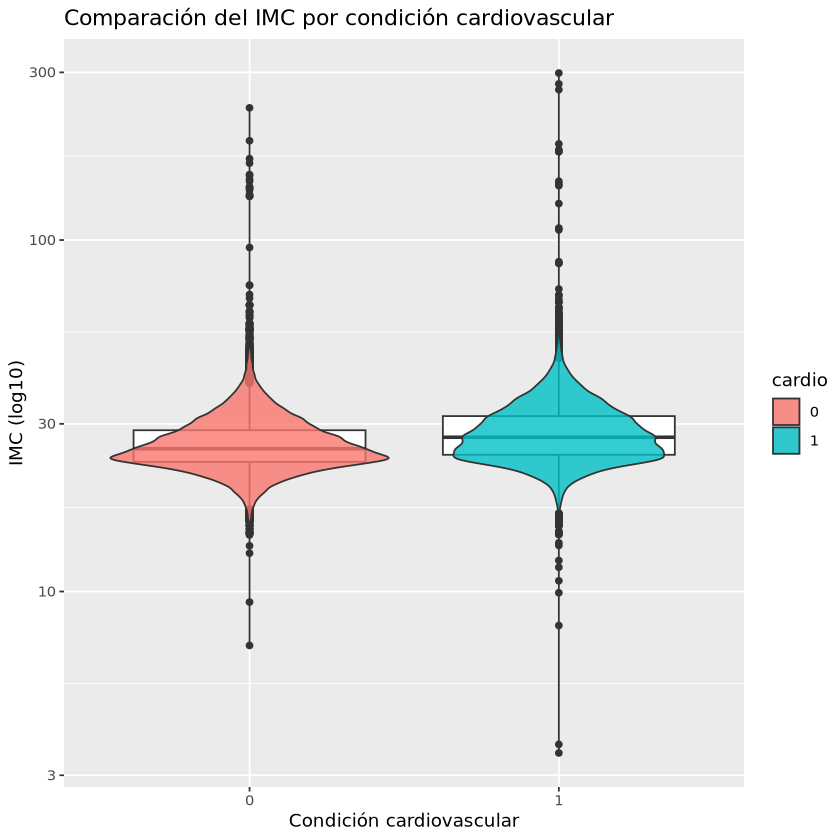

In [114]:
ggplot(data, aes(x=cardio, y=IMC, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 scale_y_continuous(trans='log10') +
 labs(title = "Comparación del IMC por condición cardiovascular", x = "Condición cardiovascular", y = "IMC (log10)")

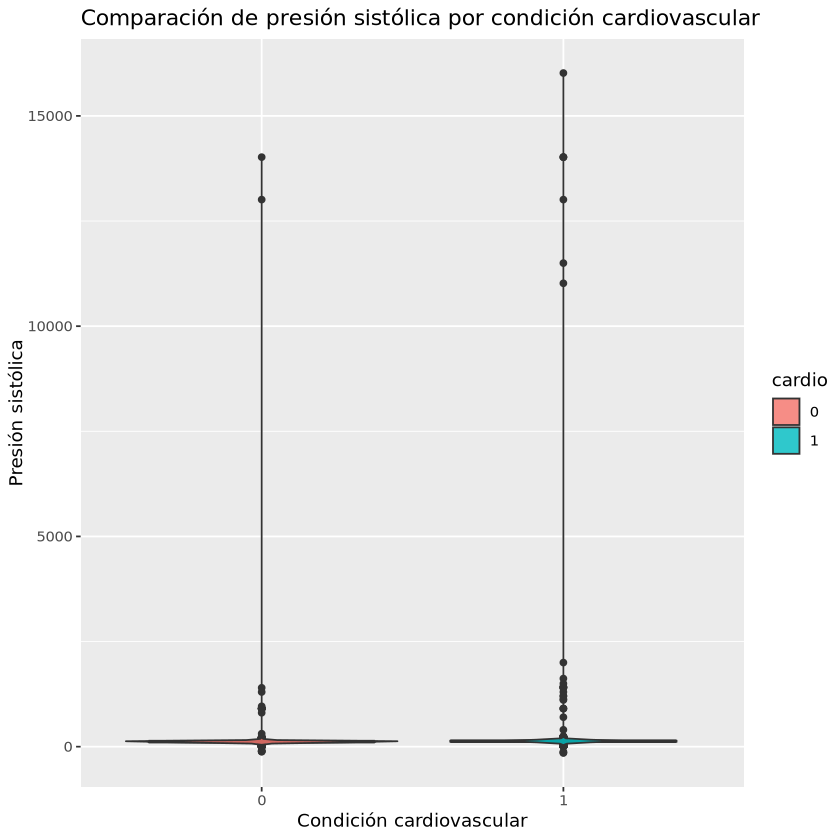

In [86]:
ggplot(data, aes(x=cardio, y=ap_hi, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Comparación de presión sistólica por condición cardiovascular", x = "Condición cardiovascular", y = "Presión sistólica")

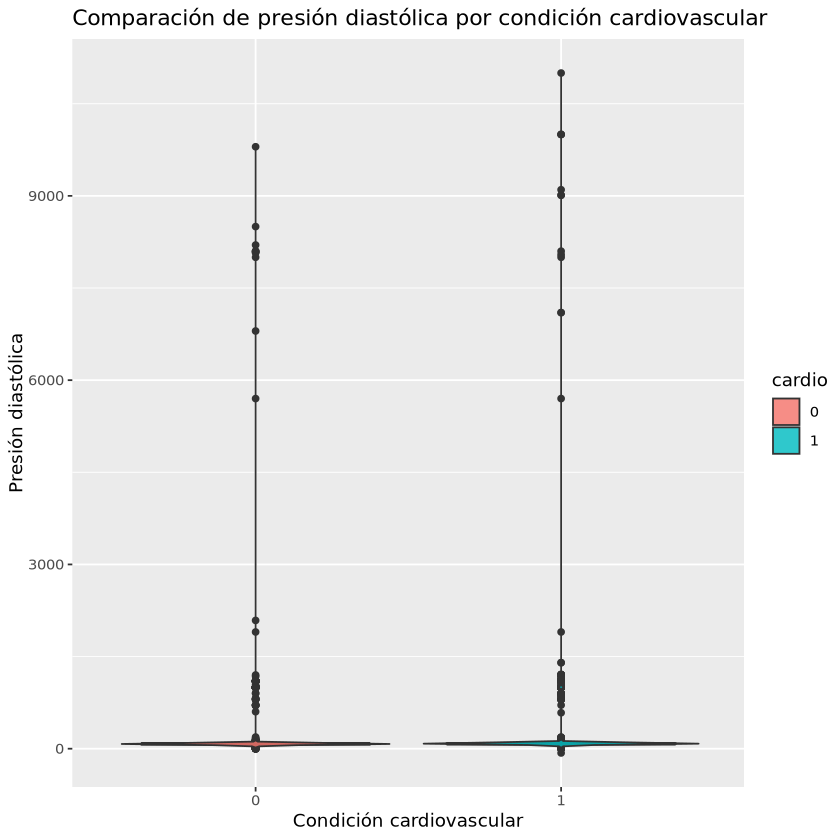

In [88]:
ggplot(data, aes(x=cardio, y=ap_lo, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Comparación de presión diastólica por condición cardiovascular", x = "Condición cardiovascular", y = "Presión diastólica")

In [ ]:
# La presión del pulso relaciona ambas presiones, y se define como la diferencia entre la presión 
# sistólica y la presión disatólca
data$Pp <- data$ap_hi - data$ap_lo

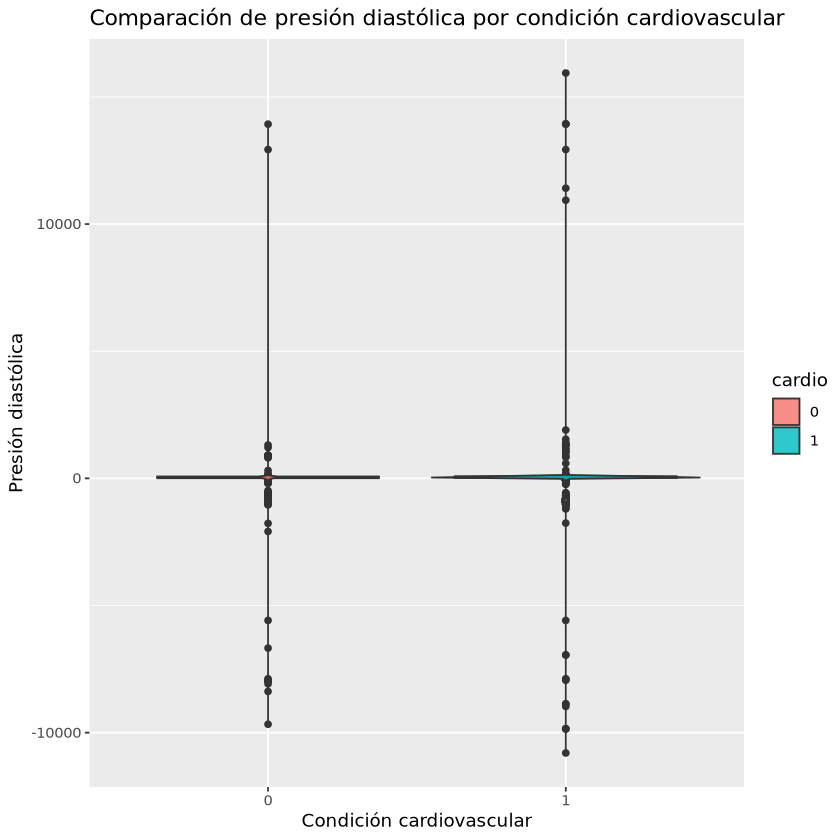

In [111]:
# Se supone que la presión sistólica siempre es mayor que la presión diastólica, 
# por lo que no debería haber valores negatrivos
ggplot(data, aes(x=cardio, y=Pp, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Comparación de presión diastólica por condición cardiovascular", x = "Condición cardiovascular", y = "Presión diastólica")

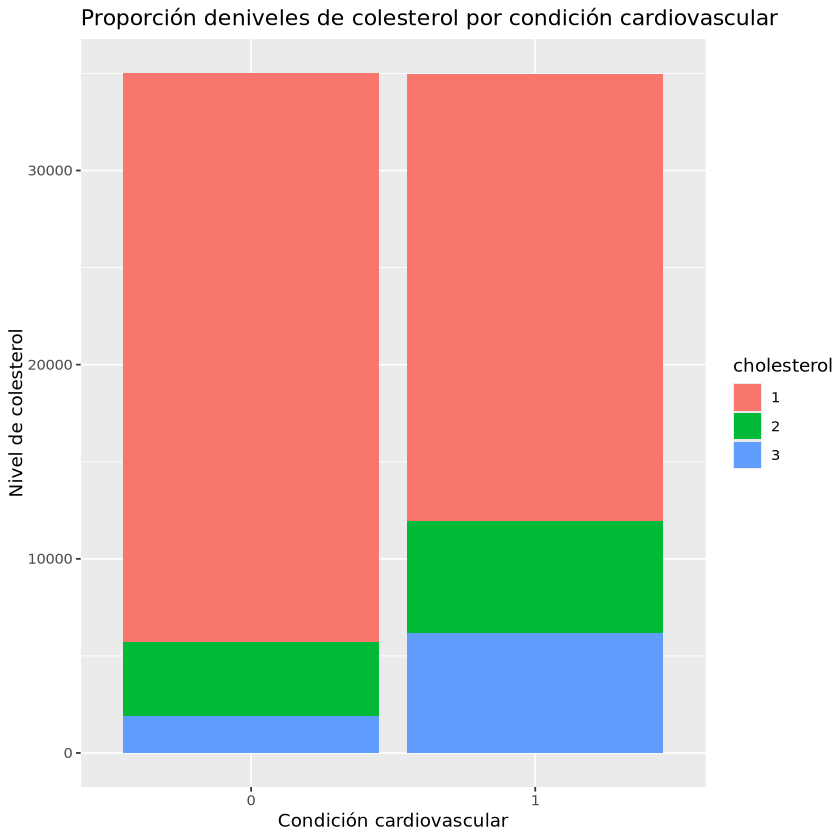

In [93]:
ggplot(data, aes(x=cardio, fill=cholesterol)) +
 geom_bar() +
 labs(title = "Proporción deniveles de colesterol por condición cardiovascular", x = "Condición cardiovascular", y = "Nivel de colesterol")

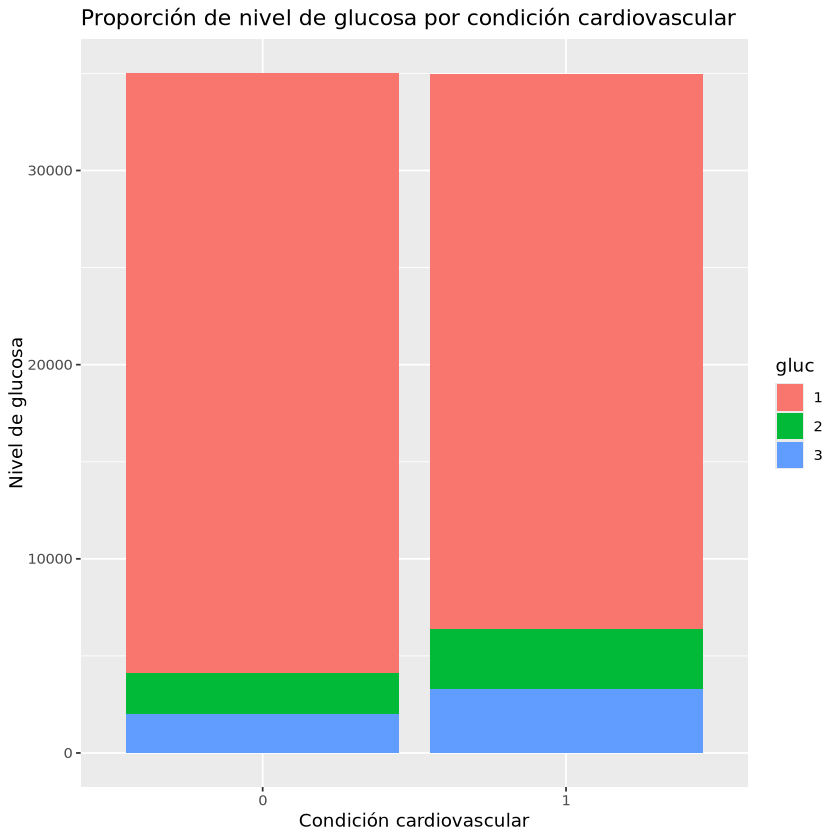

In [94]:
ggplot(data, aes(x=cardio, fill=gluc)) +
 geom_bar() +
 labs(title = "Proporción de nivel de glucosa por condición cardiovascular", x = "Condición cardiovascular", y = "Nivel de glucosa")

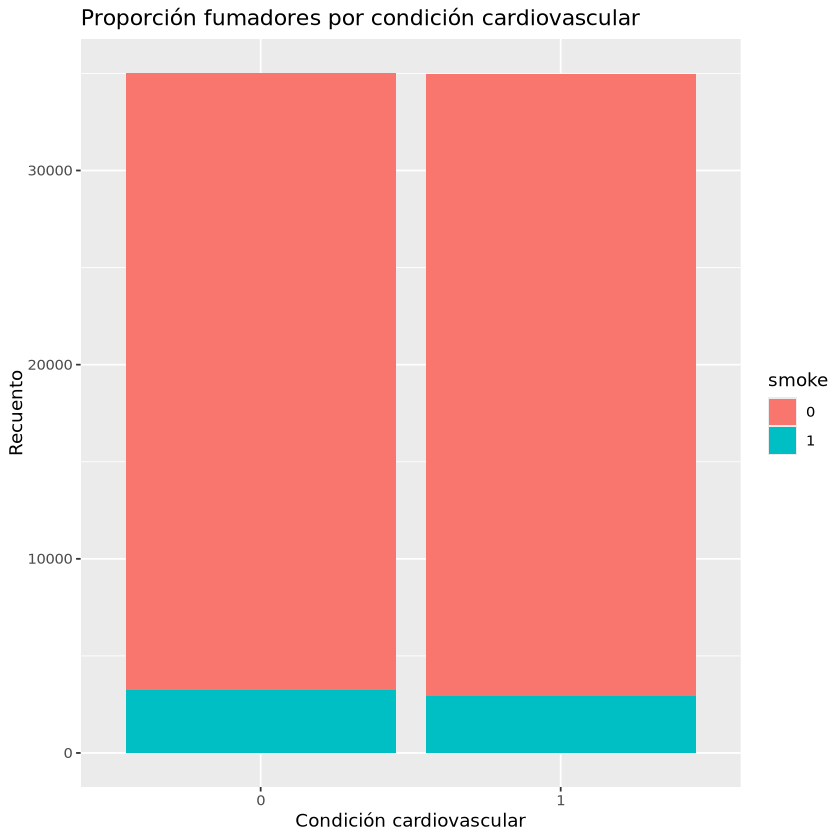

In [95]:
ggplot(data, aes(x=cardio, fill=smoke)) +
 geom_bar() +
 labs(title = "Proporción fumadores por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")

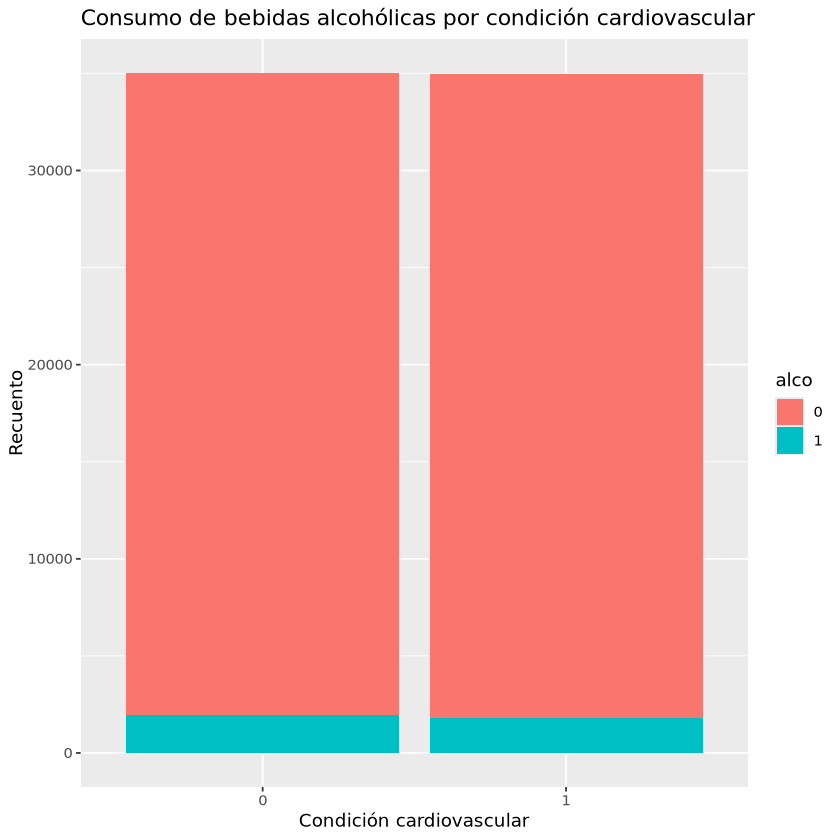

In [98]:
ggplot(data, aes(x=cardio, fill=alco)) +
 geom_bar() +
 labs(title = "Consumo de bebidas alcohólicas por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")


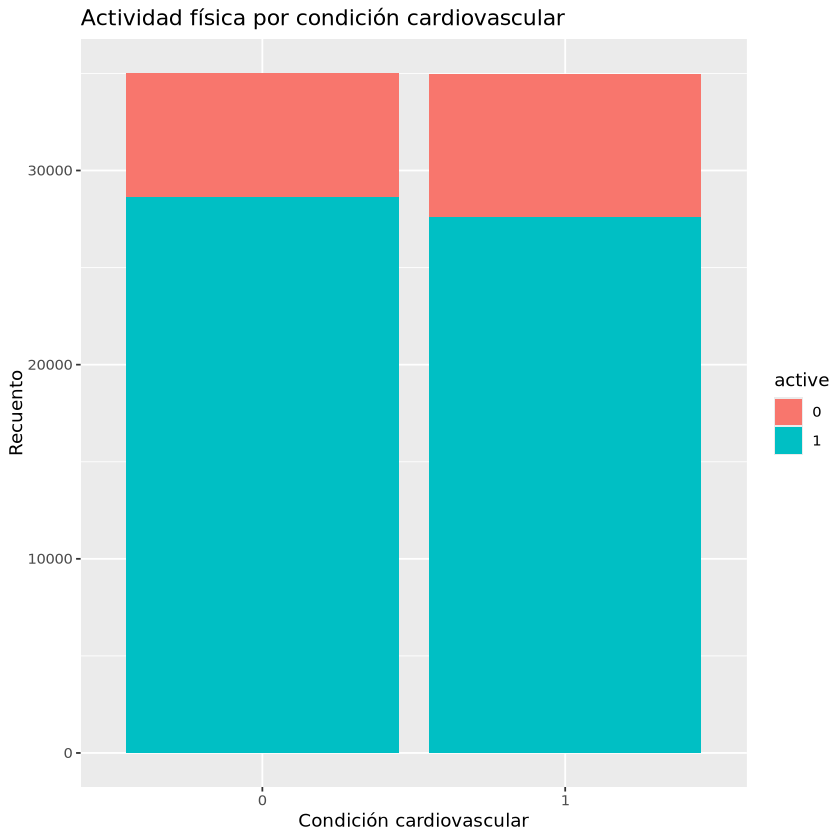

In [99]:
ggplot(data, aes(x=cardio, fill=active)) +
 geom_bar() +
 labs(title = "Actividad física por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")

De los gráficos con el IMC y la presión arterial vemos que hay mucho valores atípicos. Examinemos más de cerca.

In [101]:
summary(data[, c("height", "weight", "ap_hi", "ap_lo")])

     height          weight           ap_hi             ap_lo         
 Min.   : 55.0   Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00  
 1st Qu.:159.0   1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00  
 Median :165.0   Median : 72.00   Median :  120.0   Median :   80.00  
 Mean   :164.4   Mean   : 74.21   Mean   :  128.8   Mean   :   96.63  
 3rd Qu.:170.0   3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00  
 Max.   :250.0   Max.   :200.00   Max.   :16020.0   Max.   :11000.00  

Las anomalías más claras se encuentran en las presiones. Estas presiones deben ser números positivos que normalmente se encuentran entre 120 (presión sistólica) y 80 (presión diastólica). A su vez, la presión sistólica debería ser mayor que la presión diastólica.

A su vez, el IMC normalmente se encuentra entre 18 y 30. No obstante, tenemos valores muy extremos

In [121]:
summary(data$IMC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.472  23.875  26.374  27.557  30.222 298.667 

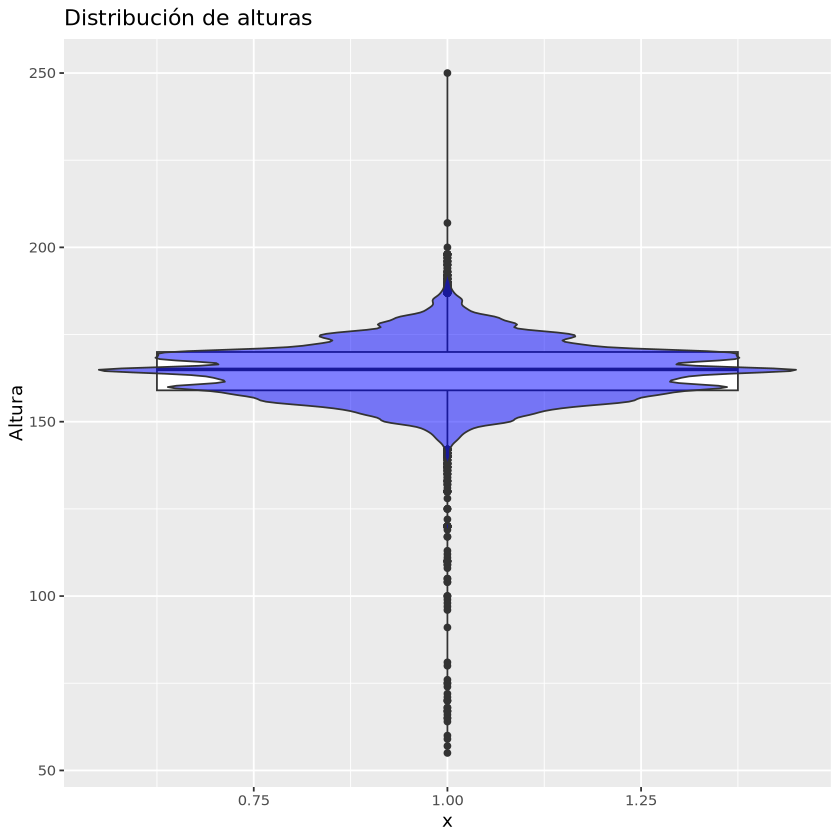

In [128]:
ggplot(data, aes(x = 1, y=height)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.5, fill="blue") +
 labs(title = "Distribución de alturas", y = "Altura")

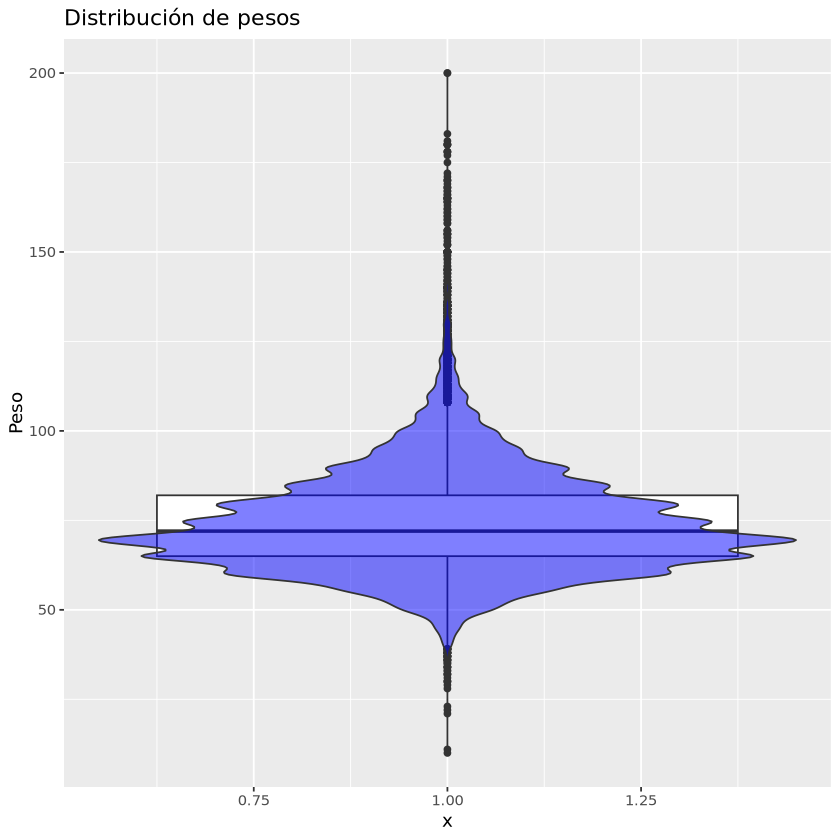

In [129]:
ggplot(data, aes(x = 1, y=weight)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.5, fill="blue") +
 labs(title = "Distribución de pesos", y = "Peso")